In [2]:
import pandas as pd
import sklearn as sk
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest

import imblearn as imb
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler, InstanceHardnessThreshold, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.keras import BalancedBatchGenerator

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from mpl_toolkits.mplot3d import Axes3D
import ast

from keras.models import Sequential # type: ignore
from keras.layers import Dense, Dropout, BatchNormalization # type: ignore
from keras.optimizers import Adam # type: ignore
from keras.losses import BinaryCrossentropy, BinaryFocalCrossentropy # type: ignore
from keras.metrics import Accuracy, AUC # type: ignore
from keras.callbacks import EarlyStopping # type: ignore



## Erythromycin

In [3]:
df = pd.read_csv('../data/practica_micro.csv')

# Create a new DataFrame with 6000 columns from the 'MALDI_binned' column
df['MALDI_binned'] = df['MALDI_binned'].apply(ast.literal_eval)
maldi_binned_df = pd.DataFrame(df['MALDI_binned'].tolist(), index=df.index)
df_expanded = pd.concat([maldi_binned_df, df.drop(columns=['MALDI_binned'])], axis=1)
df_expanded.head()

,0,1,2,3,4,5,6,7,8,9,...,5992,5993,5994,5995,5996,5997,5998,5999,Erythromycin,Ciprofloxacin
0,0.000254,0.000395,0.000453,0.000495,0.000801,0.000879,0.001296,0.000631,0.000040,0.000295,...,0.000023,0.000062,0.000061,0.000056,0.000071,0.000052,0.000044,0.000025,0.0,0.0
1,0.000339,0.000203,0.000097,0.000844,0.000769,0.000667,0.000974,0.000557,0.000116,0.000038,...,0.000056,0.000074,0.000096,0.000154,0.000075,0.000067,0.000042,0.000022,0.0,0.0
2,0.000123,0.000162,0.000089,0.000671,0.000563,0.001250,0.001091,0.000240,0.000078,0.000060,...,0.000029,0.000055,0.000112,0.000084,0.000072,0.000060,0.000046,0.000003,1.0,0.0
3,0.000282,0.000608,0.000158,0.000486,0.000495,0.000468,0.000414,0.000147,0.000160,0.000277,...,0.000037,0.000015,0.000003,0.000004,0.000021,0.000036,0.000045,0.000096,0.0,1.0
4,0.000370,0.000243,0.000149,0.000620,0.000307,0.000999,0.000981,0.000304,0.000262,0.000104,...,0.000050,0.000037,0.000025,0.000051,0.000056,0.000078,0.000099,0.000140,0.0,0.0


In [8]:
# Definir conjuntos x e y
X = df_expanded.drop(columns=['Erythromycin', 'Ciprofloxacin'])
y = df_expanded['Erythromycin']

X_train = X.sample(frac=0.8, replace=False)
X_test = X.drop(X_train.index)
y_train = y.loc[X_train.index]
y_test = y.loc[X_test.index]
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=73, stratify=y_train)

# Tamaños de los datasets resultantes
print("X_train shape:", X_train.shape)
#print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
#print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1385, 6000)
X_test shape: (346, 6000)
y_train shape: (1385,)
y_test shape: (346,)


## Keras NN

### With Validation Set to check number of epochs and avoid overfitting

Epoch 1/50


c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - auc_13: 0.5253 - loss: 0.5913 - val_auc_13: 0.5008 - val_loss: 0.1573
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc_13: 0.6826 - loss: 0.3067 - val_auc_13: 0.4984 - val_loss: 0.2397
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - auc_13: 0.7665 - loss: 0.2307 - val_auc_13: 0.4865 - val_loss: 0.2518
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - auc_13: 0.8351 - loss: 0.1839 - val_auc_13: 0.5188 - val_loss: 0.7926
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc_13: 0.9116 - loss: 0.1164 - val_auc_13: 0.5354 - val_loss: 0.3555
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc_13: 0.9199 - loss: 0.1047 - val_auc_13: 0.5471 - val_loss: 0.3078


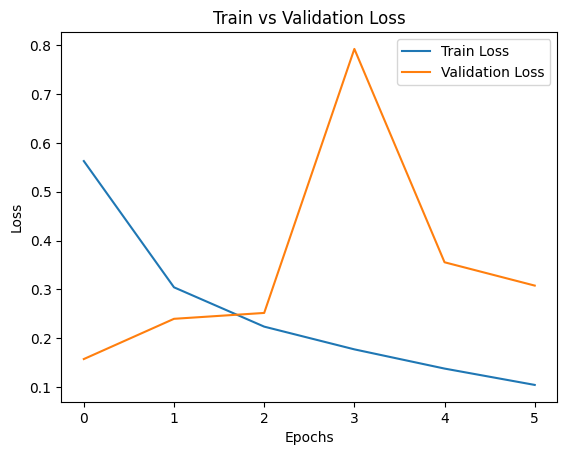

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Balanced Accuracy: 0.503887545631252


In [ ]:
### USANDO VALIDACIÓN ###

# Crear el pipeline con MinMaxScaler y PCA
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', KernelPCA(n_components=1000))  # Retener el 95% de la varianza
])

# Ajustar el pipeline en el conjunto de entrenamiento y transformar los datos
X_train_scaled = pipeline.fit_transform(X_train)
# Aplicar la misma transformación al conjunto de valid y test
X_val_scaled = pipeline.transform(X_val)
X_test_scaled = pipeline.transform(X_test)

training_generator = BalancedBatchGenerator(
    X_train_scaled, y_train, sampler=RandomUnderSampler(), batch_size=32, random_state=73
)

model = Sequential([
    Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Prueba también tanh
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryFocalCrossentropy(), metrics=[AUC()])

# Early stopping para prevenir overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    training_generator,
    epochs=50,  # Puedes aumentar las épocas para observar mejor el overfitting
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Graficar pérdidas para detectar overfitting
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

# Predecir en test
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
print(f"Balanced Accuracy: {balanced_accuracy}")

### Without Validation Set since there is very few data

In [9]:
# Crear el pipeline con MinMaxScaler y PCA
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', KernelPCA(n_components=1000))  # Retener el 95% de la varianza
])

# Ajustar el pipeline en el conjunto de entrenamiento y transformar los datos
X_train_scaled = pipeline.fit_transform(X_train)
# Aplicar la misma transformación al conjunto de test
X_test_scaled = pipeline.transform(X_test)

training_generator = BalancedBatchGenerator(
    X_train_scaled, y_train, sampler=RandomUnderSampler(), batch_size=32, random_state=73
)

model = Sequential([
    Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Prueba también tanh
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryFocalCrossentropy(), metrics=[AUC()])



# Entrenar el modelo
history = model.fit(
    training_generator,
    epochs=10,  # Puedes aumentar las épocas para observar mejor el overfitting
    verbose=1
)

# Predecir en test
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
print(f"Balanced Accuracy: {balanced_accuracy}")

Epoch 1/10


c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\guigr\anaconda3\envs\tfm\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - auc_1: 0.5483 - loss: 0.4388
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc_1: 0.6852 - loss: 0.2807
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc_1: 0.8173 - loss: 0.1850 
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc_1: 0.8572 - loss: 0.1430 
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc_1: 0.8783 - loss: 0.1332 
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc_1: 0.9250 - loss: 0.0983 
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc_1: 0.9613 - loss: 0.0665 
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc_1: 0.9695 - loss: 0.0613 
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc_1: 0.9833 - loss: 0.0455 
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc_1: 0.9860 - loss: 0.0410 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Balanced Accuracy: 0.6204968944099378


### Explainability with SHAP

In [ ]:
import shap

# Apply SHAP to MALDI-TOF Data
explainer_shap_maldi = shap.Explainer(model, X_test_scaled)
shap_values_maldi = explainer_shap_maldi(X_test_scaled)
print(shap_values_maldi.shape)

PermutationExplainer explainer: 347it [16:27,  2.85s/it]                         

(346, 1000)
.values =
array([[ 1.59744168e-02,  3.21900919e-03,  2.22161710e-03, ...,
         1.69852376e-05, -1.83203444e-04,  2.19480470e-04],
       [ 1.73349768e-03, -1.57378227e-03, -6.79925092e-03, ...,
        -1.27625465e-04, -1.86087415e-04,  1.27001926e-04],
       [-1.84601504e-02, -5.75887963e-03, -2.23356999e-03, ...,
         3.64808142e-04, -6.07689023e-04, -1.42914578e-04],
       ...,
       [-2.98105290e-02, -2.15343013e-04, -1.24377020e-03, ...,
         2.35280544e-04, -9.32534039e-05, -4.60564494e-04],
       [-3.23676549e-03, -7.35103250e-03,  9.30183083e-04, ...,
        -4.72248942e-04,  4.47011143e-04,  3.04466486e-04],
       [-7.19528638e-03, -6.29184753e-03, -5.92073664e-03, ...,
         3.10135074e-03, -1.81217596e-03, -1.32620260e-04]])

.base_values =
array([[0.40065964],
       [0.40065964],
       [0.40065964],
       [0.40065964],
       [0.40065964],
       [0.40065964],
       [0.40065964],
       [0.40065964],
       [0.40065964],
       [0.400659

In [ ]:
# Specify the class index you want to explain
class_index = 0

# Ensure that shap_values_maldi is a list (one array per class)
# and select the SHAP values for the desired class
shap_values_class = shap_values_maldi[:, :, class_index]

# Generate feature names
feature_names = [f"Bin_PCA_{i+1}" for i in range(X_test_scaled.shape[1])]

shap.summary_plot(shap_values_class, X_test_scaled, feature_names=feature_names, plot_type="bar")

AssertionError: Summary plots need a matrix of shap_values, not a vector.

## Random Forest

In [14]:
from sklearn.model_selection import GridSearchCV

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Lasso for feature selection
lasso = LassoCV(cv=5, random_state=73)
lasso.fit(X_train_scaled, y_train)

# Select features with non-zero coefficients
selected_features = np.where(lasso.coef_ != 0)[0]
X_train_scaled = X_train_scaled[:, selected_features]
X_test_scaled = X_test_scaled[:, selected_features]

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=73)

# Initialize GridSearchCV with the RandomForestClassifier and the parameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Fit the RandomForestClassifier with the best parameters on the training data
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_rf = best_rf_classifier.predict(X_test_scaled)

# Calculate balanced accuracy
balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)
print(f"Balanced Accuracy (Random Forest): {balanced_accuracy_rf}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'max_depth': 20, 'n_estimators': 50}
Best cross-validation score: 0.5127272727272727
Balanced Accuracy (Random Forest): 0.5142857142857142


In [18]:
# Create a SHAP explainer for the Random Forest model
explainer_rf = shap.Explainer(best_rf_classifier, X_test_scaled)

# Compute SHAP values for the test set
shap_values_rf = explainer_rf(X_test_scaled)

print(shap_values_rf.shape)

(346, 63, 2)


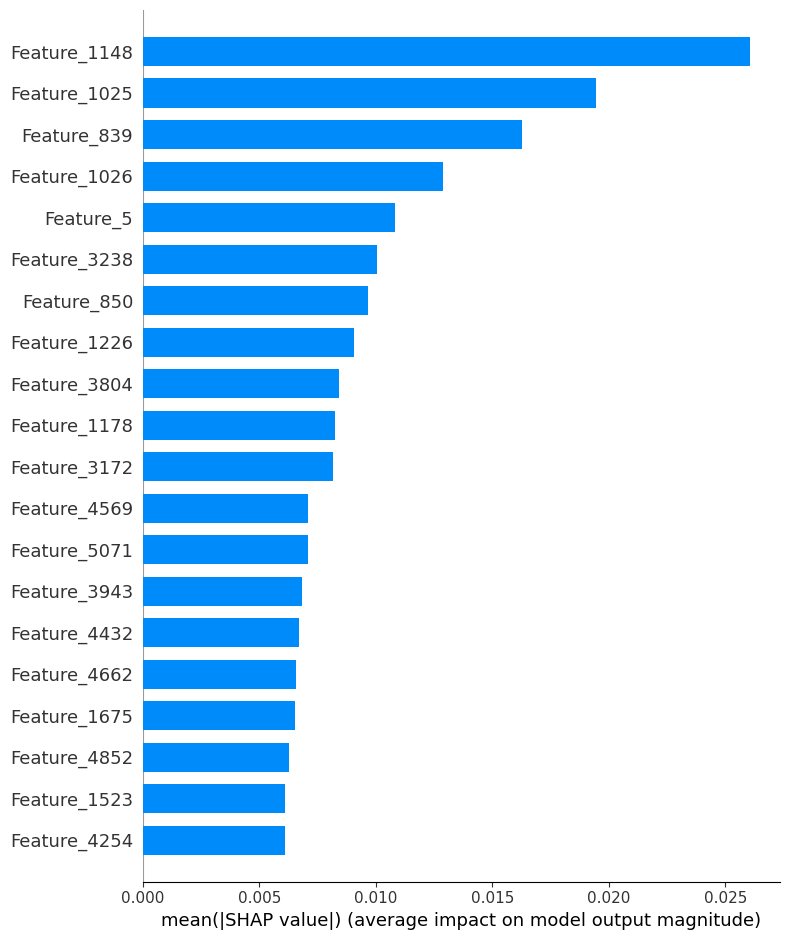

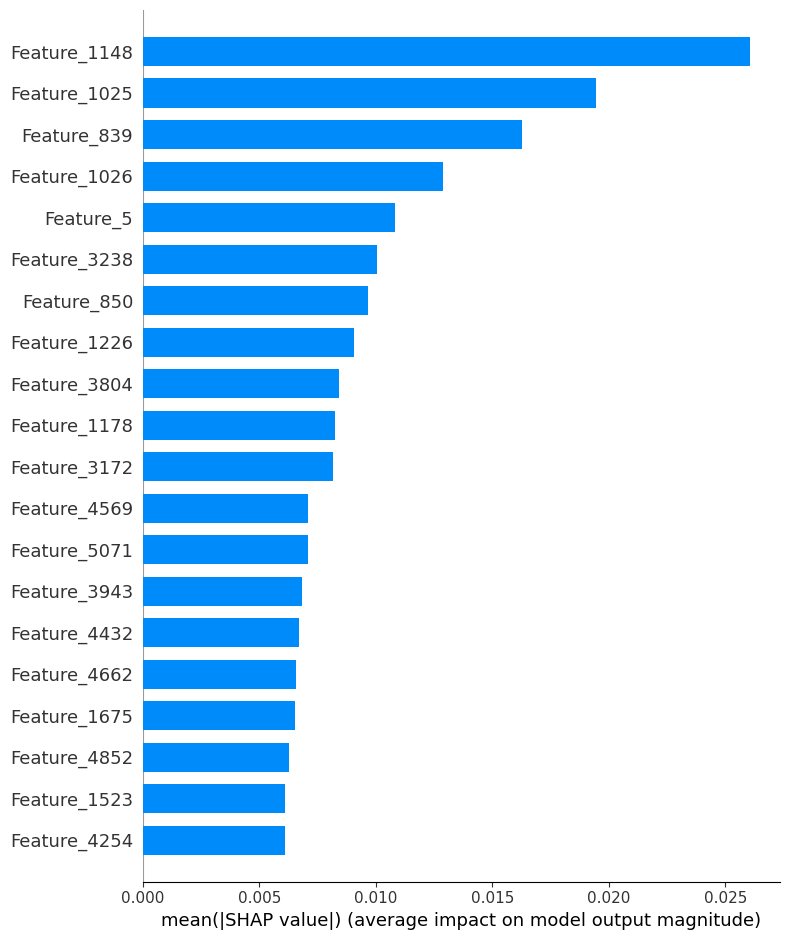

In [25]:
# Generate feature names for the selected features
selected_feature_names = [f"Feature_{i+1}" for i in selected_features]

# Specify the class index you want to explain
class_index = 0
shap_values_class_0 = shap_values_rf[:, :, class_index]
# Generate a summary plot to visualize the SHAP values
shap.summary_plot(shap_values_class_0, X_test_scaled, feature_names=selected_feature_names, plot_type="bar")

# Specify the class index you want to explain
class_index = 1
shap_values_class_1 = shap_values_rf[:, :, class_index]
# Generate a summary plot to visualize the SHAP values
shap.summary_plot(shap_values_class_1, X_test_scaled, feature_names=selected_feature_names, plot_type="bar")